In [2]:
import nltk
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json #storing files

In [3]:
politics_data = pd.read_csv("../sample_data/politics_sample3.csv", 
                            header=None, 
                            names = ['author', 'subreddit', 'body', 'score', 'created_dt', 'link_id', 'parent_id'],
                            index_col = False)

In [4]:
print(len(set(politics_data.loc[politics_data['body'].notna()]['author'].values)))

136429


In [4]:
politics_text = politics_data.loc[politics_data['body'].notna()]['body'].values

In [4]:
print(len(politics_text))

999960


In [5]:
# print([i for i in politics_text if 'removal' in i.lower() and 'thank you for participating' not in i.lower()])
print([i for i in politics_text if 'thank you for participating' in i.lower()][:20])

["Hi `trueslicky`. Thank you for participating in /r/Politics. However, [your submission](https://www.reddit.com/r/politics/comments/48bvig/trump_security_choke_slams_photographer_at_rally/) has been removed for the following reason(s):\n\n* [Not Exact Title](http://www.reddit.com/r/politics/wiki/rulesandregs#wiki_do_not_create_your_own_title) - Your headline must be comprised only of the copied and pasted headline of the article AND/OR a continuous quote taken from the article. If using a quote, it should reflect the article as a whole.\n\n    **We recommend not using the Reddit 'suggest a title' as it tends to not give the exact title of the article.**\n\n\n\nIf you have any questions about this removal, please feel free to [message the moderators.](https://www.reddit.com/message/compose?to=/r/politics&amp;subject=Question regarding the removal of this submission by /u/trueslicky&amp;message=I have a question regarding the removal of this [submission.](https://www.reddit.com/r/politi

In [6]:
print(len([i for i in politics_text if 'thank you for participating' in i.lower()]))

7782


In [7]:
mod_msg_file = open('ty_for_participating.txt', 'w')
mod_msg_file.writelines([i for i in politics_text if 'thank you for participating' in i.lower()])
mod_msg_file.close()

In [6]:
politics_text1 = [i for i in politics_text if 'thank you for participating' not in i.lower()]

In [9]:
for i in range(10):
    print(i)
    print([j for j in politics_text if 'removed' in j.lower()][i])

for i in range(10):
    print(i)
    print([j for j in politics_text if 'deleted' in j.lower()][i])


0
Because they didn't distinguish New York Times from New York Times Editorial Board? And the mods removed it? This pisses me off. Does anyone think it would have been removed if it was a Sanders endorsement? 
1
[removed]
2
Hi `trueslicky`. Thank you for participating in /r/Politics. However, [your submission](https://www.reddit.com/r/politics/comments/48bvig/trump_security_choke_slams_photographer_at_rally/) has been removed for the following reason(s):

* [Not Exact Title](http://www.reddit.com/r/politics/wiki/rulesandregs#wiki_do_not_create_your_own_title) - Your headline must be comprised only of the copied and pasted headline of the article AND/OR a continuous quote taken from the article. If using a quote, it should reflect the article as a whole.

    **We recommend not using the Reddit 'suggest a title' as it tends to not give the exact title of the article.**



If you have any questions about this removal, please feel free to [message the moderators.](https://www.reddit.com/m

In [7]:
print(len([i for i in politics_text if 'removed' in i.lower()]))
print(len([i for i in politics_text if 'deleted' in i.lower()]))
removed_str = [i for i in politics_text if 'removed' in i.lower()][1]
print([i for i in politics_text1 if 'removed' in i.lower()][:10])
print([i for i in politics_text if 'deleted' in i.lower()][:10])
deleted_str = [i for i in politics_text if 'deleted' in i.lower()][0]
print(len([i for i in politics_text1 if 'removed' in i.lower() and i.lower() != removed_str]))
print([i for i in politics_text1 if 'removed' in i.lower() and i.lower() != removed_str][:5])
print(len([i for i in politics_text if 'deleted' in i.lower() and i.lower() != deleted_str]))
print([i for i in politics_text1 if 'deleted' in i.lower() and i.lower() != deleted_str][:5])

23129
54129
["Because they didn't distinguish New York Times from New York Times Editorial Board? And the mods removed it? This pisses me off. Does anyone think it would have been removed if it was a Sanders endorsement? ", '[removed]', '[removed]', '[removed]', '[removed]', '[removed]', "Incest I understand having issues with, forcing relations on a non-consenting adult - but why should it be criminal for 3 or more consenting adults to enter into a marriage?  Why is it okay for only 2?  I mean, it's not for me - but just as I wouldn't want to restrict 2 same sex partners from wedding, I don't think it is fair to restrict other *legally consenting* adults.\n\nHowever, I do have issues with giving up the civil reigns of marriage when do many civil benefits are dependent on having that status.  Unless those government benefits are removed (such as differential taxation or rights to make medical decisions for a spouse), the government needs to be providing equitable access and certificati

In [11]:
politics_text1 = [i for i in politics_text1 if i != deleted_str and i != removed_str]

In [12]:
print(len([i for i in politics_text1 if '/r/' in i]))
print([i for i in politics_text1 if '/r/' in i][:20])
print(len([i for i in politics_text1 if '/u/' in i]))
print([i for i in politics_text1 if '/u/' in i][:20])

9842
['If that\'s true then Obama and half the democratic members of congress are "neocon\'s" too.  The (admittedly sad) truth is that the policies we\'re talking about are overwhelmingly supported by the US political community.  They can only be called "centrist" by anyone sane (which rules out /r/politics of course).\n\nThat doesn\'t mean you have to support them, or that Sanders isn\'t right (frankly this is one spot where I\'m on his side).  But spinning this as if Hillary is way out of the democratic mainstream isn\'t correct or helpful.', "Its like /r/shittyaskhistory and /r/shittyamericangovernment in here\n\nEP was a war time measure against states in rebellion. It didn't legally free the slaves, it confiscated property which is why it didn't apply to the states that weren't in rebellion. Lincoln fought hard to get the 13th amendment passed, spending much political capital to do so. Why people try to revise this part of history is beyond me. ", '/r/NotTheOnion', 'The Hillary su

In [13]:
politics_text1 = [re.sub(r'https?:\/\/[\S]+', ' ', i, flags=re.MULTILINE) for i in politics_text1]

In [14]:
print([i for i in politics_text1 if '\n' in i][:10])
print([re.sub(r'\n', '', i) for i in politics_text1 if '\n' in i][:10])
print([re.sub(r'&gt;', '', i) for i in politics_text1 if '&gt;' in i][:10])

["&gt; (assuming that gas is taxed by the price not he unit).\n\nIirc it is taxed as a flat amount per gallon and it hasn't increased for a long time.", "Doesn't mean he shouldn't run. And might I point out that Obama was a black senator from Chicago, when everyone was gearing up for the first female president. \n\nBut that doesn't mean I think Sanders can win. But, just saying. ", "This is what gets me about the Benghazi...first off as someone who is familiar with the different levels of chain of command Hillary Clinton really wouldn't have any say on the ground operations staff. That is many pay grades below that position. Secondly occassionally bad shit is going happen and 4 brave americans died. Its tragic, but its not her fault.\n\nAnd I don't even like the lady and hope she doesn't become president.\n\nNow the emails, she fucked up there.", "It's ok, no one is saying that we need background checks for stamps :)\n\nAnd I think we all agree there should be background checks on all 

In [15]:
politics_text1 = [re.sub(r'\n', '', i) for i in politics_text1]
politics_text1 = [re.sub(r'&gt;', '', i) for i in politics_text1]

In [16]:
print([(re.findall(r'\w+', i.lower()),nltk.word_tokenize(i.lower())) for i in politics_text1[:20]])
# print([nltk.word_tokenize(i.lower()) for i in politics_text1[:20]])

[(['well', 'he', 'did', 'stab', 'a', 'guy', 'you', 'know'], ['well', 'he', 'did', 'stab', 'a', 'guy', ',', 'you', 'know', '.']), (['but', 'they', 're', 'probably', 'our', 'best', 'friends', 'out', 'of', 'any', 'of', 'them', 'no'], ['but', 'they', "'re", 'probably', 'our', 'best', 'friends', 'out', 'of', 'any', 'of', 'them', ',', 'no', '?']), (['it', 'sounds', 'like', 'they', 'were', 'funneling', 'money', 'into', 'the', 'county', 'democratic', 'party', 'apparatus', 'and', 'then', 'routing', 'it', 'back', 'to', 'democratic', 'candidates', 'through', 'various', 'means', 'isn', 't', 'this', 'the', 'same', 'scam', 'hillary', 'and', 'the', 'dnc', 'are', 'pulling', 'except', 'with', 'state', 'democratic', 'parties'], ['it', 'sounds', 'like', 'they', 'were', 'funneling', 'money', 'into', 'the', 'county', 'democratic', 'party', 'apparatus', 'and', 'then', 'routing', 'it', 'back', 'to', 'democratic', 'candidates', 'through', 'various', 'means', '...', 'is', "n't", 'this', 'the', 'same', 'scam', 

In [23]:
def tokenize_data(data):
    print("Number of entries in original dataset: " + str(len(data)))
    data1 = [i for i in data if 'thank you for participating' not in i.lower()]
    print("Number of moderator posts removed from dataset: " + str(len([i for i in data if 'thank you for participating' in i.lower()])))
    data1 = [i for i in data1 if i != deleted_str and i != removed_str]
    print("Number of user-deleted posts removed from dataset: " + str(len([i for i in data if i == deleted_str])))
    print("Number of mod/admin-deleted posts removed from dataset: " + str(len([i for i in data if i == removed_str])))
    
    print("Number of entries in modified dataset: " + str(len(data1)))
    
    # removing hyperlinks
    print("Number of comments with a hyperlink in modified dataset: " + str(len([i for i in data1 if "http" in i])))
    data1 = [re.sub(r'https?:\/\/[\S]+', ' ', i, flags=re.MULTILINE) for i in data1]
    
    # common escape sequences
    data1 = [re.sub(r'\n', '', i) for i in data1]
    data1 = [re.sub(r'&gt;', '', i) for i in data1]
    
    # convert to lowercase
    data1 = [i.lower() for i in data1]
    
    # keep user and subreddit tags
    print("Number of comments that mention a user in the modified dataset: " + str(len([i for i in data1 if "/u/" in i])))
    print("Number of comments that mention a subreddit in the modified dataset: " + str(len([i for i in data1 if "/r/" in i])))
    data1 = [re.sub(r'/u/', '_user_', i) for i in data1]
    data1 = [re.sub(r'/r/', '_subreddit_', i) for i in data1]
    
    data_tokenized = [re.findall(r'\w+', i.lower()) for i in data1]
    
    # remove numbers
    data_tokenized = [[token for token in doc if not token.isnumeric()] for doc in data_tokenized]
    
    print("Number of total tokens: " + str(sum([len(d) for d in data_tokenized])))
    
    return data_tokenized

In [24]:
politics_tokens = tokenize_data(politics_text)

Number of entries in original dataset: 999960
Number of moderator posts removed from dataset: 7782
Number of user-deleted posts removed from dataset: 53033
Number of mod/admin-deleted posts removed from dataset: 13208
Number of entries in modified dataset: 925937
Number of comments with a hyperlink in modified dataset: 52354
Number of comments that mention a user in the modified dataset: 1993
Number of comments that mention a subreddit in the modified dataset: 7655
Number of total tokens: 37838663


In [25]:
with open("politics_tokens.json", 'w') as f:
    json.dump(politics_tokens, f)

In [11]:
print(removed_str == '[removed]')
print(deleted_str == '[deleted]')

True
True


## Check number of authors

In [5]:
politics_data_notna = politics_data.loc[politics_data['body'].notna()]

In [8]:
def remove_bad_comments(chunk, deleted_str = '[deleted]', removed_str = '[removed]'):
    comments = chunk['body'].values
    auths = chunk['author'].values
    
    good_indices = [i for i in range(len(comments)) if comments[i] != deleted_str 
                    and comments[i] != removed_str
                    and 'thank you for participating' not in comments[i].lower()]
        
    return (list(comments[good_indices]), list(auths[good_indices]))

In [9]:
comments, auths = remove_bad_comments(politics_data_notna)

In [10]:
print(len(set(auths)))
print(len(auths))

136424
925937


In [11]:
auths_unique = list(set(auths))
auths_unique_reverse = {auths_unique[i] : i for i in range(len(auths_unique))}

In [12]:
auth_nums = np.zeros(len(auths_unique))

In [13]:
for i in auths:
    auth_nums[auths_unique_reverse[i]] += 1

In [41]:
print(min(auth_nums))
print(max(auth_nums))

1.0
13642.0


In [50]:
print(np.argsort(auth_nums)[-1])
print(auths_unique[np.argsort(auth_nums)[-1]])
print(auth_nums[np.argsort(auth_nums)[-2]])
print(auth_nums[np.argsort(auth_nums)[-3]])
print(auth_nums[np.argsort(auth_nums)[-4]])

84974
[deleted]
1612.0
1554.0
895.0


(array([1.36098e+05, 2.54000e+02, 5.00000e+01, 1.70000e+01, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00]),
 array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800., 2000.]),
 <a list of 10 Patch objects>)

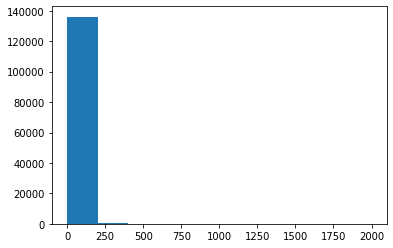

In [58]:
plt.hist(list(auth_nums[:84974]) + list(auth_nums[84975:]), range = (0,2000))


(array([1.35228e+05, 8.70000e+02, 1.93000e+02, 6.10000e+01, 3.10000e+01,
        1.90000e+01, 1.00000e+01, 7.00000e+00, 2.00000e+00, 0.00000e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

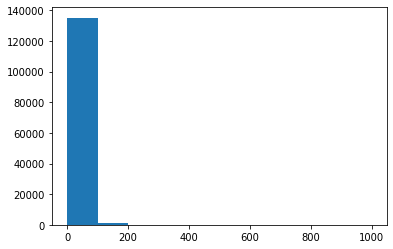

In [56]:
plt.hist(auth_nums, range = (0, 1000))

(array([118958.,   8564.,   3073.,   1693.,   1003.,    672.,    507.,
           342.,    221.,    215.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

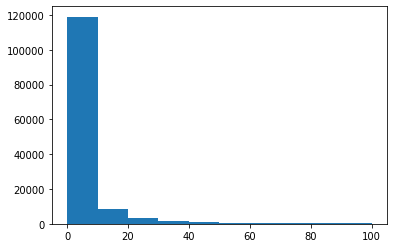

In [55]:
plt.hist(auth_nums, range = (0, 100))


In [16]:
print(np.sum(auth_nums >= 5))
print(np.sum(auth_nums < 5))
print(np.sum(auth_nums >= 10))
print(np.sum(auth_nums < 10))
print(np.sum(auth_nums >= 50))
print(np.sum(auth_nums < 50))
print(np.sum(auth_nums >= 100))
print(np.sum(auth_nums < 100))

32321
104103
17466
118958
3133
133291
1196
135228


In [34]:
print(int(np.sum(auth_nums)))
print(int(np.sum(auth_nums[auth_nums >= 5])))
print(int(np.sum(auth_nums[auth_nums < 5])))
print(int(np.sum(auth_nums[auth_nums >= 10])))
print(int(np.sum(auth_nums[auth_nums < 10])))
print(int(np.sum(auth_nums[auth_nums >= 50])))
print(int(np.sum(auth_nums[auth_nums < 50])))
print(int(np.sum(auth_nums[auth_nums >= 100])))
print(int(np.sum(auth_nums[auth_nums < 100])))

925937
757760
168177
661165
264772
370359
555578
238883
687054


## Check high-scoring comments

In [ ]:
def high_scoring_comments(chunk, deleted_str = '[deleted]', removed_str = '[removed]', min_score = 10):
    comments = chunk['body'].values
    auths = chunk['author'].values
    scores = chunk['score'].values
    
    good_indices = [i for i in range(len(comments)) if comments[i] != deleted_str 
                    and comments[i] != removed_str
                    and 'thank you for participating' not in comments[i].lower()
                    and scores[i] >= min_score]
        
    return (list(comments[good_indices]), list(auths[good_indices]))

In [18]:
comments10, auths10 = high_scoring_comments(politics_data_notna)

In [20]:
print(len(comments10))
print(len(set(auths10)))

90727
36460


0.0
1236.0


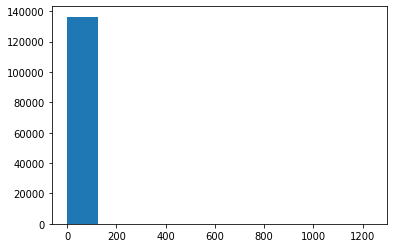

In [39]:
auth_nums10 = np.zeros(len(auths_unique))

for i in auths10:
    auth_nums10[auths_unique_reverse[i]] += 1
    
print(max(auth_nums10))
plt.hist(auth_nums10)
plt.show()

In [54]:
print(auths_unique[np.argsort(auth_nums10)[-1]])
print(auth_nums10[np.argsort(auth_nums10)[-2]])
print(auth_nums10[np.argsort(auth_nums10)[-3]])
print(auth_nums10[np.argsort(auth_nums10)[-4]])

[deleted]
115.0
111.0
110.0


In [31]:
auths_with_5_comments = set([auths_unique[i] for i in range(len(auths_unique)) if auth_nums[i] >= 5])
print(len(auths_with_5_comments))
auths_with_10_comments = set([auths_unique[i] for i in range(len(auths_unique)) if auth_nums[i] >= 10])
print(len(auths_with_10_comments))
auths_with_50_comments = set([auths_unique[i] for i in range(len(auths_unique)) if auth_nums[i] >= 50])
print(len(auths_with_50_comments))
auths_with_100_comments = set([auths_unique[i] for i in range(len(auths_unique)) if auth_nums[i] >= 100])
print(len(auths_with_100_comments))

32321
17466
3133
1196


In [33]:
print(len([1 for i in auths10 if i in auths_with_5_comments]))
print(len([1 for i in auths10 if i in auths_with_10_comments]))
print(len([1 for i in auths10 if i in auths_with_50_comments]))
print(len([1 for i in auths10 if i in auths_with_100_comments]))

73397
63748
35657
22870


In [35]:
comments100, auths100 = high_scoring_comments(politics_data_notna, min_score = 100)

In [36]:
print(len(comments100))
print(len(set(auths100)))

6878
5357


In [37]:
print(len([1 for i in auths100 if i in auths_with_5_comments]))
print(len([1 for i in auths100 if i in auths_with_10_comments]))
print(len([1 for i in auths100 if i in auths_with_50_comments]))
print(len([1 for i in auths100 if i in auths_with_100_comments]))

5394
4622
2423
1550
